In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader
from pathlib import Path
import sys
sys.path.append(str(Path('../../').resolve()))

In [3]:
%autoreload
import v4.pytorch_unet.unet as unet
from v4.pytorch_unet.learner import UNetLearner
from v4.pytorch_unet.unet_dataset import UNetDataset

In [4]:
#mnist = datasets.MNIST(Path('./mnist'), download=True, transform=torchvision.transforms.Compose([
#                               torchvision.transforms.ToTensor(),
#                               torchvision.transforms.Normalize(
#                                 (0.1307,), (0.3081,))
#                             ]))
#train_loader = torch.utils.data.DataLoader(mnist, batch_size=4000, shuffle=True, num_workers=4, pin_memory=True)

In [5]:
train_dataset = UNetDataset(root_dir=Path('simple_dataset'), part='train')
valid_dataset = UNetDataset(root_dir=Path('simple_dataset'), part='valid')
train_loader = DataLoader(train_dataset)
valid_loader = DataLoader(valid_dataset)

In [6]:
model = unet.ResNetUnet(in_channels=train_dataset.image_channels, in_size=train_dataset.item_size, n_classes=len(train_dataset.classes), depth=4)
#model.cuda();

In [7]:
%autoreload
from v4.pytorch_unet.learner import UNetLearner

In [8]:
learner = UNetLearner(model, train_loader, valid_loader, cuda=True)

In [9]:
train_dataset[0][1].shape

torch.Size([300, 300])

In [10]:
learner.train(n_epochs=100, lr=3e-4, momentum=0.9)

Epoch 99
train_loss 0.0401852743079265
valid_loss 0.016106221824884415
accuracy 43499.71666666667
------------------


In [16]:
{key: 1 for (key, value) in learner.epoch_metrics.items()}

{'train_loss': 1, 'valid_loss': 1, 'accuracy': 1}

In [11]:
test = {'train_loss': 0, 'valid_loss': 0, 'accuracy': 0}
{key: value for key, value in enumerate(test)}

{0: 'train_loss', 1: 'valid_loss', 2: 'accuracy'}

ITEM torch.Size([1, 1, 300, 300])
ITEM torch.Size([1, 1, 300, 300])


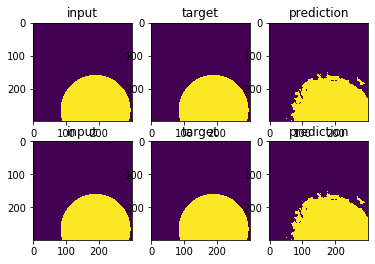

In [11]:
learner.show_train_results(2)